In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
import pandas as pd
data = pd.read_csv('data_python.csv')
data.head()
P2 = 1 - data['P1']
data['P2'] = P2

In [3]:
train_x1 = data['X1'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
stdsc = StandardScaler()
train_x = stdsc.fit_transform(train_x1)
joblib.dump(stdsc, "stdsc_python_mlp_x15f.m")
train_y = data['X1'].values.reshape(233600, 1)
index = [x for x in range(233600) if x % 146 == 0]
train_y = np.delete(train_y, index)

In [6]:
T_new = []
for i in range(1600):
    tmp = np.array([0] * 9).reshape(-1, 1)
    tmp = np.vstack((tmp, train_x[i * 146: (i + 1)* 146 - 1]))
#     y_new.append(train_y[i * 146 + 1: (i + 1)* 146])
    for j in range(len(tmp) - 9):
        T_new.append(tmp[j: j + 10])
train_x = np.array(T_new).reshape(232000, 10)
print(train_x.shape, train_x[:5, :])

(232000, 10) [[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.         -2.39069909]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.         -2.39069909 -2.39069909]
 [ 0.          0.          0.          0.          0.          0.          0.
  -2.39069909 -2.39069909 -2.39069909]
 [ 0.          0.          0.          0.          0.          0.
  -2.39069909 -2.39069909 -2.39069909 -2.39069909]
 [ 0.          0.          0.          0.          0.         -2.39069909
  -2.39069909 -2.39069909 -2.39069909 -2.39069909]]


In [7]:
train_y = train_y.reshape(232000, 1)

In [8]:
X_train = train_x[:186880, :]
X_test = train_x[186880:, :]
Y_train = train_y[:186880, :]
Y_test = train_y[186880:, :]

In [9]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1], )))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
history = model.fit(X_train, Y_train, batch_size=146, epochs=40,
                    validation_data=(X_test, Y_test))

Train on 186880 samples, validate on 45120 samples
Epoch 1/40
186880/186880 [==============================] - 2s 8us/step - loss: 0.2622 - val_loss: 0.0016
Epoch 2/40
186880/186880 [==============================] - 1s 6us/step - loss: 6.3977e-04 - val_loss: 1.7268e-04
Epoch 3/40
186880/186880 [==============================] - 1s 6us/step - loss: 1.0631e-04 - val_loss: 6.4567e-05
Epoch 4/40
186880/186880 [==============================] - 1s 6us/step - loss: 4.3833e-05 - val_loss: 2.7526e-05
Epoch 5/40
186880/186880 [==============================] - 1s 6us/step - loss: 1.7833e-05 - val_loss: 1.0219e-05
Epoch 6/40
186880/186880 [==============================] - 1s 6us/step - loss: 6.0243e-06 - val_loss: 3.2162e-06
Epoch 7/40
186880/186880 [==============================] - 1s 6us/step - loss: 2.1101e-06 - val_loss: 1.4058e-06
Epoch 8/40
186880/186880 [==============================] - 1s 6us/step - loss: 1.1237e-06 - val_loss: 7.9997e-07
Epoch 9/40
186880/186880 [===================

In [11]:
res = model.predict(X_test)
print(res.shape)

(45120, 1)


In [12]:
model.save('mlp_x1_10f.h5')

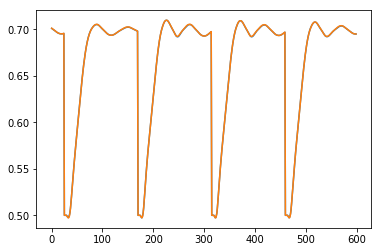

In [13]:
import matplotlib.pyplot as plt
plt.plot(res[:600])
plt.plot(Y_test[:600])
plt.show()

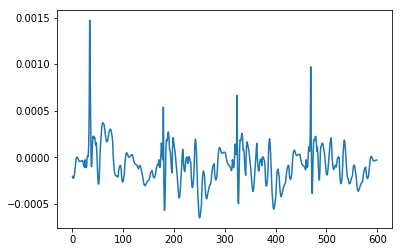

In [14]:
plt.plot(res[:600] - Y_test[:600])
plt.show()